![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Advanced Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Spannungsverteilung im Untergrund unter Zusatzbelastungen

* Grenzzustand der Gebrauchstauglichkeit
* Setzungsprognosen
* Gründungen

In [18]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
from scipy import stats

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/stresses_under_loads_plots.ipynb

from matplotlib.colors import SymLogNorm
import warnings
warnings.filterwarnings('ignore')

Ein einfaches Modell für die Spannungsausbreitung unter einer vertikalen Last ist das Walzenmodell (siehe Vorlesungsunterlagen) für 2D bzw. das Kugelmodell für den 3D Fall. Die Verteilung im Walzenmodell entspricht der Binomialverteilung mit $p=0.5$. Diese Verteilung lässt sich mit dem Galton Brett veranschaulichen:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Galton_box.jpg/1024px-Galton_box.jpg" style="width: 600px;"/>

Die Binomialverteilung beschreibt die Anzahl der Erfolge in einer Serie von $n$ gleichartigen und unabhängigen Versuchen, die jeweils genau zwei mögliche Ergebnisse haben: Erfolg mit der Wahrscheinlichkeit $p$ und Misserfolg mit der Wahrscheinlichkeit $1-p$. Die Wahrscheinlichkeit von $k$ Erfolgen ergibt sich dann aus:

$$
    B(k | p,n) = \binom{n}{k} \cdot p^k (1-p)^{n-k} \qquad k \in [0,n]
$$

Im Folgenden Plot können wir nun den Anteil der Vertikalkraft in einzelnen Körnern in den Bodenschichten unterhalb des 'Krafteinleitungskorns' im Rahmen des Walzenmodells veranschaulichen. Layer 1 ist also die aus 2 lasttragenden Körnern bestehende Schicht, Layer 2 die darauffolgende mit 3 lasttragenden Körnern und so weiter.

Beobachten sie die Form der Verteilung sowie das Abfallen der Last mit zunehmender Tiefe. Vergleichen Sie die Lösung qualitativ mit der im Nachgang verwendeten Formel nach Bernoulli.

In [19]:
#HIDDEN
interactive_binomial()

interactive(children=(BoundedIntText(value=10, description='layer', max=1000, min=1), Output()), _dom_classes=…

## Spannungen im elastischen Halbraum in Folge einer vertikalen Punktlast

Der Boden sei homogen, verhalte sich linear elastisch und sei in seinen Eigenschaften isotrop. Das Eigengewicht wird in der Formel nicht berücksichtigt, es handelt sich also um *Zusatzspanunngen* in Folge der Belastung durch die Einzellast $F$. Gemäß des unter den genannten Voraussetzungen gültigen Superpositionsprinzips können die Ausgangsspannungen berücksichtigt werden:

\begin{align}
    \sigma_{ij} = \sigma_{ij,0} + \Delta \sigma_{ij}
\end{align}

Man beachte, dass oftmals statt $\Delta \sigma_{ij}$ vereinfachend $\sigma_{ij}$ geschrieben wird, was gelegentlich als Annahme des gewichtslosen Bodens bezeichnet wird. In nichtlinearen Materialmodellen müssen jedoch die Gesamtspannungszustände eingang finden. Hier wird entsprechend auf diese möglicherweise missverständliche Notation verzichtet.

Die kartesischen Koordinaten $x,y,z$ ($z$ vertikal) haben ihren Ursprung am Angriffspunkt der Punktlast. Zusätzlich werden die horizontal radialen Abstände $r$ sowie der räumliche Abstant $R$ wie folgt definiert:

\begin{align}
    r &= \sqrt{x^2 + y^2}
    \\
    R &= \sqrt{x^2 + y^2 + z^2}
\end{align}

Nach der analytischen Lösung von Boussinesq ergeben sich die folgenden Gleichungen für die sechs unabhängigen Spannungskoordinaten (man beachte, dass die dimensionsbehafteten Terme vor den dimensionslos formulierten Klammerausdrücken stehen):

\begin{align}
    \Delta \sigma_{xx} &= \frac{3F_z}{2\pi R^2} \left[ \frac{x^2 z}{R^3} - \frac{1-2\nu}{3} \left( \frac{(x^2 - y^2) R}{r^2 (R + z)} + \frac{y^2 z}{R r^2}\right) \right]
    \\
    \Delta \sigma_{yy} &= \frac{3F_z}{2\pi R^2} \left[ \frac{y^2 z}{R^3} - \frac{1-2\nu}{3} \left( \frac{(y^2 - x^2) R}{r^2 (R + z)} + \frac{x^2 z}{R r^2}\right) \right]
    \\
    \Delta \sigma_{zz} &= \frac{3F_z}{2\pi R^2} \frac{z^3}{R^3}
    \\
    \Delta \sigma_{xy} &= \frac{3F_z}{2\pi R^2} \left[ \frac{x y z}{R^3} - \frac{1-2\nu}{3} \frac{xy(2R+z)}{R(R+z)^2} \right]
    \\
    \Delta \sigma_{yz} &= \frac{3F_z}{2\pi R^2} \frac{yz^2}{R^3}
    \\
    \Delta \sigma_{xz} &= \frac{3F_z}{2\pi R^2} \frac{xz^2}{R^3}
\end{align}

**Übung:**

* Wie vereinfachen sich die o.g. Gleichungen für ein inkompressibles Material? Welchen Vorteil hat die auftretende Lösung aus bodenmechanischer Sicht?
* Was fällt an der Lösung der Vertikalspannungszuwächse auf?
* Wie verhalten sich die Spannungen in der Nähe der Lasteinleitungsstelle?

Wir schauen uns zunächst die Lösung der Vertikalspannung in verschiedenen Tiefen unter der Last an. Dazu definieren wir eine Last von $F_z = 100$ kN sowie eine Querkontraktionszahl von $\nu = 0.3$ an und betrachten die Lösung in der $x-z$ Ebene.

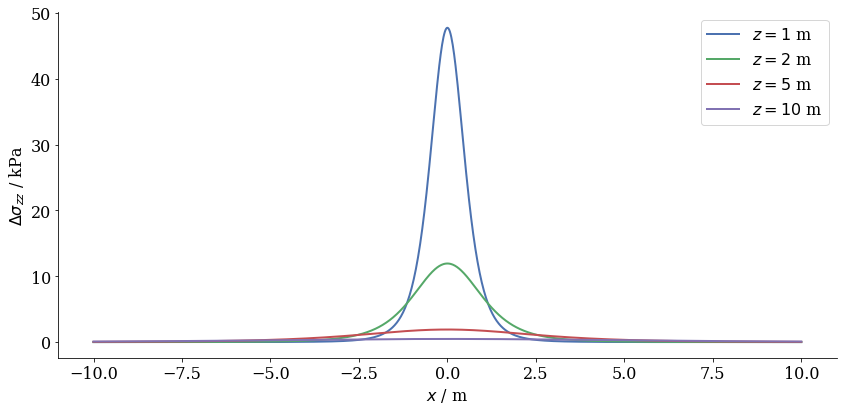

In [20]:
#HIDDEN
plot_szz_Boussinesq()

Zur Verallgemeinerung stellen wir nun nur einen normierten Anteil der Spannungen dar und plotten die Linien in ihrer tatsächlichen Tiefe.

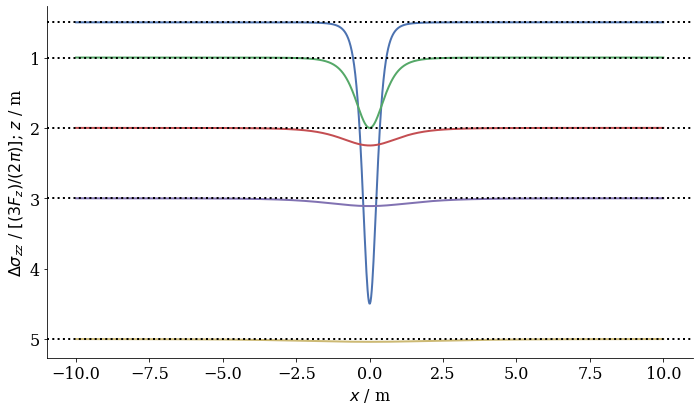

In [21]:
#HIDDEN
plot_szz_Boussinesq_depth()

Aufgrund der Ähnlichkeit der Spannungsverteilungen in verschiedenen Tiefen vergleichen wir nun die Verläufe der einzelnen Spannungskoordinaten nur in einer ausgewählten Tiefe von 1 m.

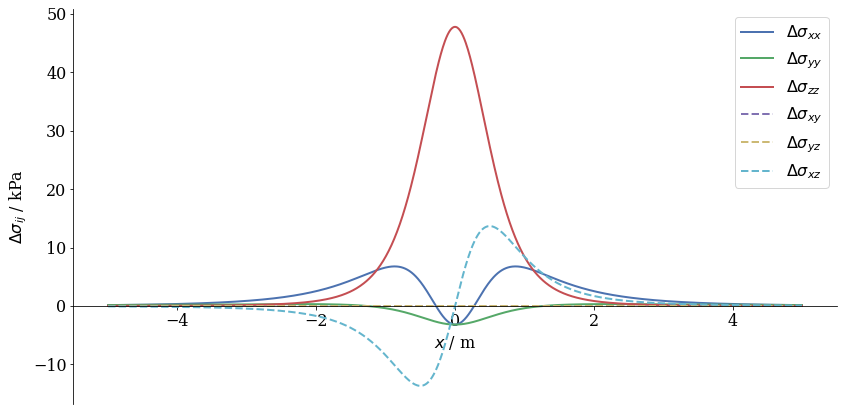

In [22]:
#HIDDEN
plot_all_Boussinesq(0.3)

Es treten offensichtlich Zugspannungen auf. Wir plotten das Diagramm nochmals mit $\nu = 0.5$.

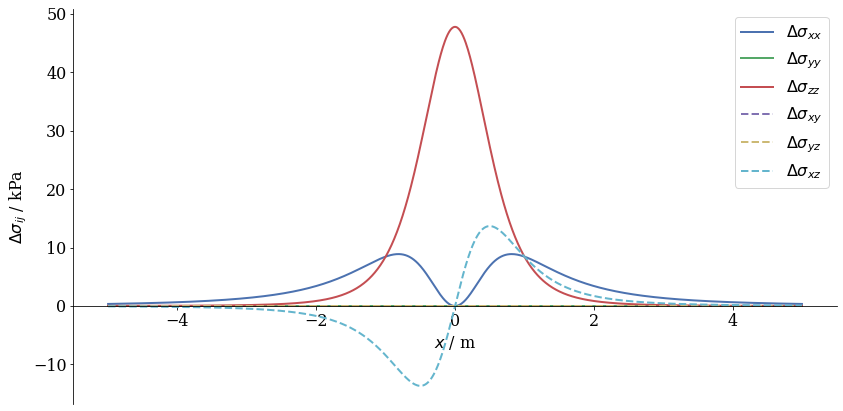

In [23]:
#HIDDEN
plot_all_Boussinesq(0.5)

Man vergleiche dieses Ergebnis mit folgendem Bild:

<img src="https://raw.githubusercontent.com/nagelt/Teaching_Scripts/master/Images/tyres.jpg" style="width: 800px;"/>

Quelle: https://www.roadex.org/e-learning/lessons/permanent-deformation/stresses-and-strains-in-road-structures/

Aufschlussreich ist auch das Darstellen sogenannter Spannungszwiebeln. Dabei handelt es sich um Isobaren bestimmter Spannungskoordinaten. Wir stellen diese nun zunächst für die Vertikalspannung dar.

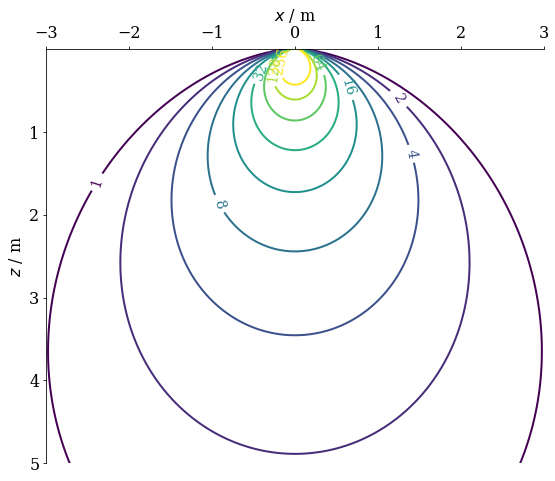

In [24]:
#HIDDEN
#%run plot_functions/stresses_under_loads_plots.ipynb
plot_isobars_zz_Boussinesq()

Spannungsoptische Messverfahren erlauben, derartige Verläufe (Spannungsgradienten) über spannungsabhängige Brechungszahlen (photoelastischer Effekt) sichtbar zu machen:

<img src="https://raw.githubusercontent.com/nagelt/Teaching_Scripts/master/Images/Kontakt_Spannungsoptik.jpeg" style="width: 800px;"/>

Quelle: Wikipedia

Derartige Darstellungen sind auch für die Hauptspannungen üblich. Diese gewinnen wir durch Hauptachsentransformation bzw. die Bestimmung der Eigenwerte der Koordinatenmatrix des Spannungstensors. Siehe: https://nagelt.github.io/Teaching_Scripts/Hauptspannungen.html

Wir stellen die Hauptspannungsisobaren für $\nu = 0.3$ dar.

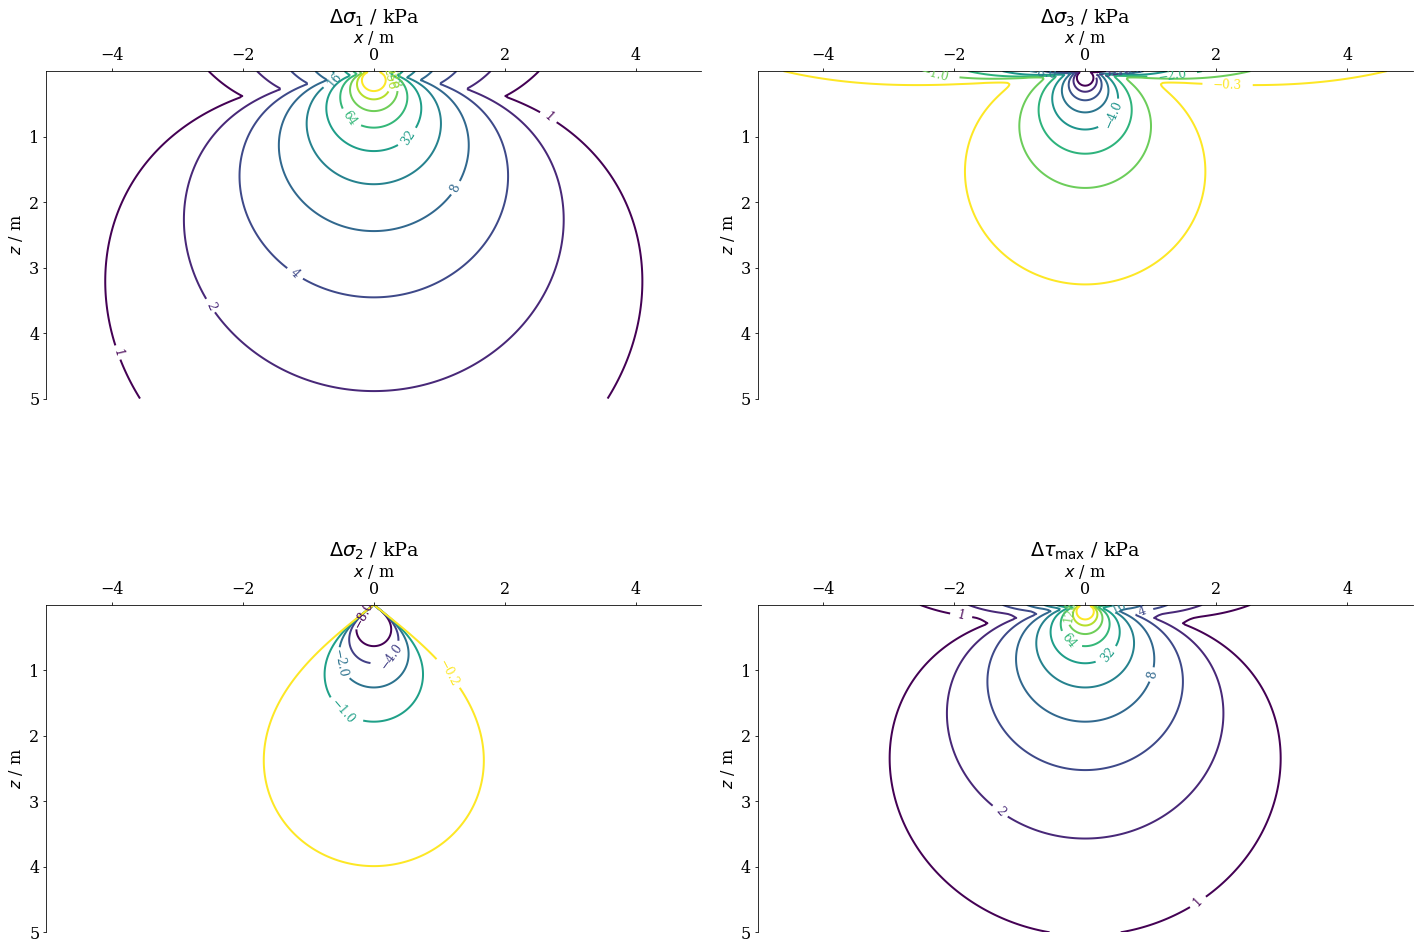

In [25]:
#HIDDEN
plot_isobars_principal_Boussinesq()

Zu jeder Hauptspannung gehört ein Richtungsvektor. Damit lassen sich die Hautspannungstrajektorien abbilden und so der Lastabtrag in den Untergrund veranschaulichen.

Zunächst betrachten wir das Bild für $\nu = 0.3$.

Man beachte: Es werden die Größenordnungen (dekadische Exponenten) der Spannungen dargestellt. Die Darstellung ist aus Symmetriegründen auf die linke Hälfte reduziert.

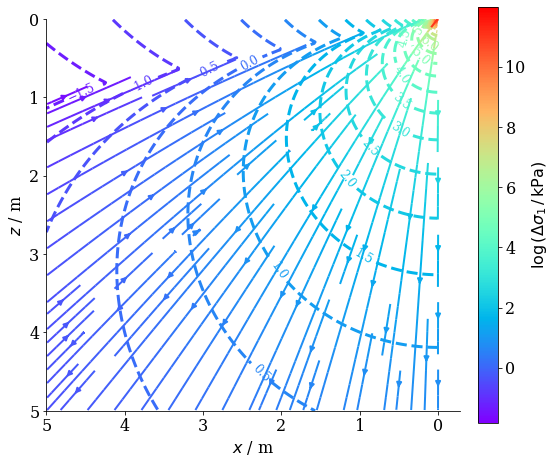

In [26]:
#HIDDEN
#%run plot_functions/stresses_under_loads_plots.ipynb
plot_stress_trajectory_Boussinesq()

Das folgende Bild stellt den Fall für $\nu = 0.5$ dar.

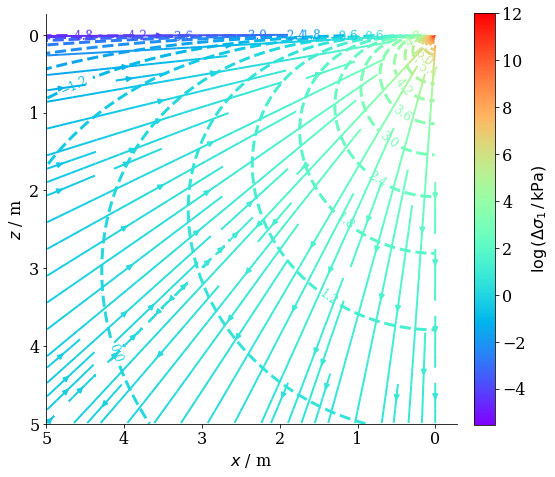

In [27]:
#HIDDEN
plot_stress_trajectory_Boussinesq(0.5)

Nun ist auch das Verhältnis interessant, in dem die Zusatzbelastungen $\Delta \sigma_{ij}$ zu den aus dem Eigengewicht resultierenden Spannungen $\sigma_{0,ij}$ stehen und sich zu den Gesamtspannungen $\sigma_{ij}$ addieren. Dafür nehmen wir zunächst vereinfachend folgenden aus der Bodenwichte resultierenden Grundspannungszustand an:

$$
    \sigma_{0,ij} = \begin{pmatrix}
    \frac{\nu}{1-\nu} & 0 & 0 \\
    0 & \frac{\nu}{1-\nu} & 0 \\
    0 & 0 & 1
    \end{pmatrix} \gamma z
$$

Betrachtet werde nun der Fall für $\gamma = 18\,$kN/m³.

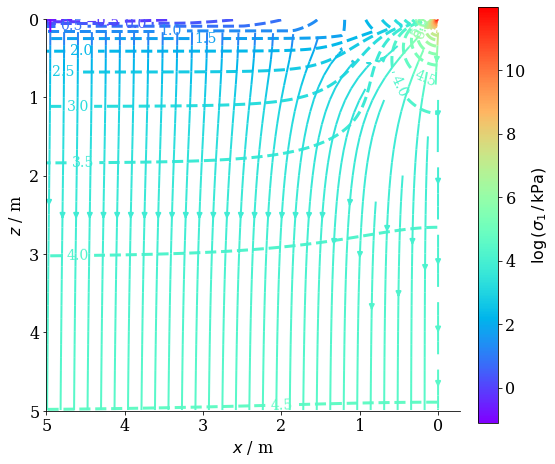

In [28]:
#HIDDEN
#%run plot_functions/stresses_under_loads_plots.ipynb
plot_stress_trajectory_Boussinesq_total()

Dieser natürliche Lastabtrag, also das Abklingen der Zusatzspannungen im Vergleich zum lithostatischen Grundspannungszustand, betrifft einen umso größeren Bereich, je weniger kompressibel das Material angesetzt wird. Zur Verdeutlichung sei nun das Bild für $\nu = 0.45$ geplottet.

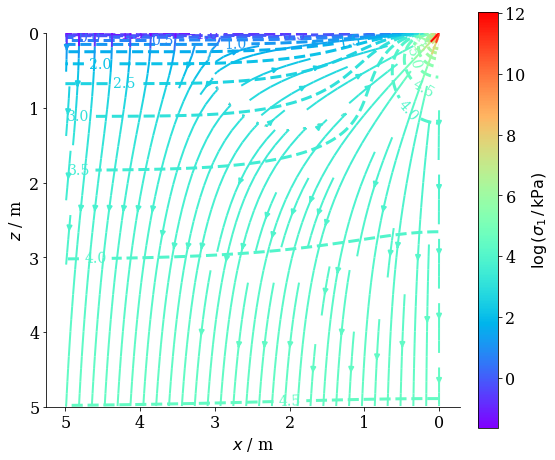

In [29]:
#HIDDEN
#%run plot_functions/stresses_under_loads_plots.ipynb
plot_stress_trajectory_Boussinesq_total(nu=0.48)

## Spannungen im elastischen Halbraum in Folge einer horizontalen Punktlast

Gegeben sei eine horizontale Last in $x$-Richtung (Koordinatensysteme siehe Vorlesungsunterlagen)

\begin{align}
    \Delta \sigma_{xx} &= \frac{F_x x}{2\pi R^3} \left[ \frac{3 x^2}{R^2} - \frac{1-2\nu}{(R+z)^2} \left( y^2 - R^2 + \frac{2Ry^2}{R+z}\right) \right]
    \\
    \Delta \sigma_{yy} &= \frac{F_x x}{2\pi R^3} \left[ \frac{3 y^2}{R^2} - \frac{1-2\nu}{(R+z)^2} \left( x^2 - 3 R^2 + \frac{2Rx^2}{R+z}\right) \right]
    \\
    \Delta \sigma_{zz} &= \frac{F_x x}{2\pi R^3} \frac{3z^2}{R^2}
    \\
    \Delta \sigma_{xy} &= \frac{F_x y}{2\pi R^3} \left[ \frac{3 x^2}{R^2} - \frac{1-2\nu}{(R+z)^2} \left( x^2 - R^2 + \frac{2Rx^2}{R+z}\right) \right]
    \\
    \Delta \sigma_{yz} &= \frac{F_x x}{2\pi R^3} \frac{3yz}{R^2}
    \\
    \Delta \sigma_{xz} &= \frac{F_x x}{2\pi R^3} \frac{3xz}{R^3}
\end{align}

Wir lassen nun eine horizontale Kraft von 100 kN in positive $x$-Richtung auf die Geländeoberfläche wirken und schauen uns die Hauptspannungsisobaren in der Ebene $y=0$ an.

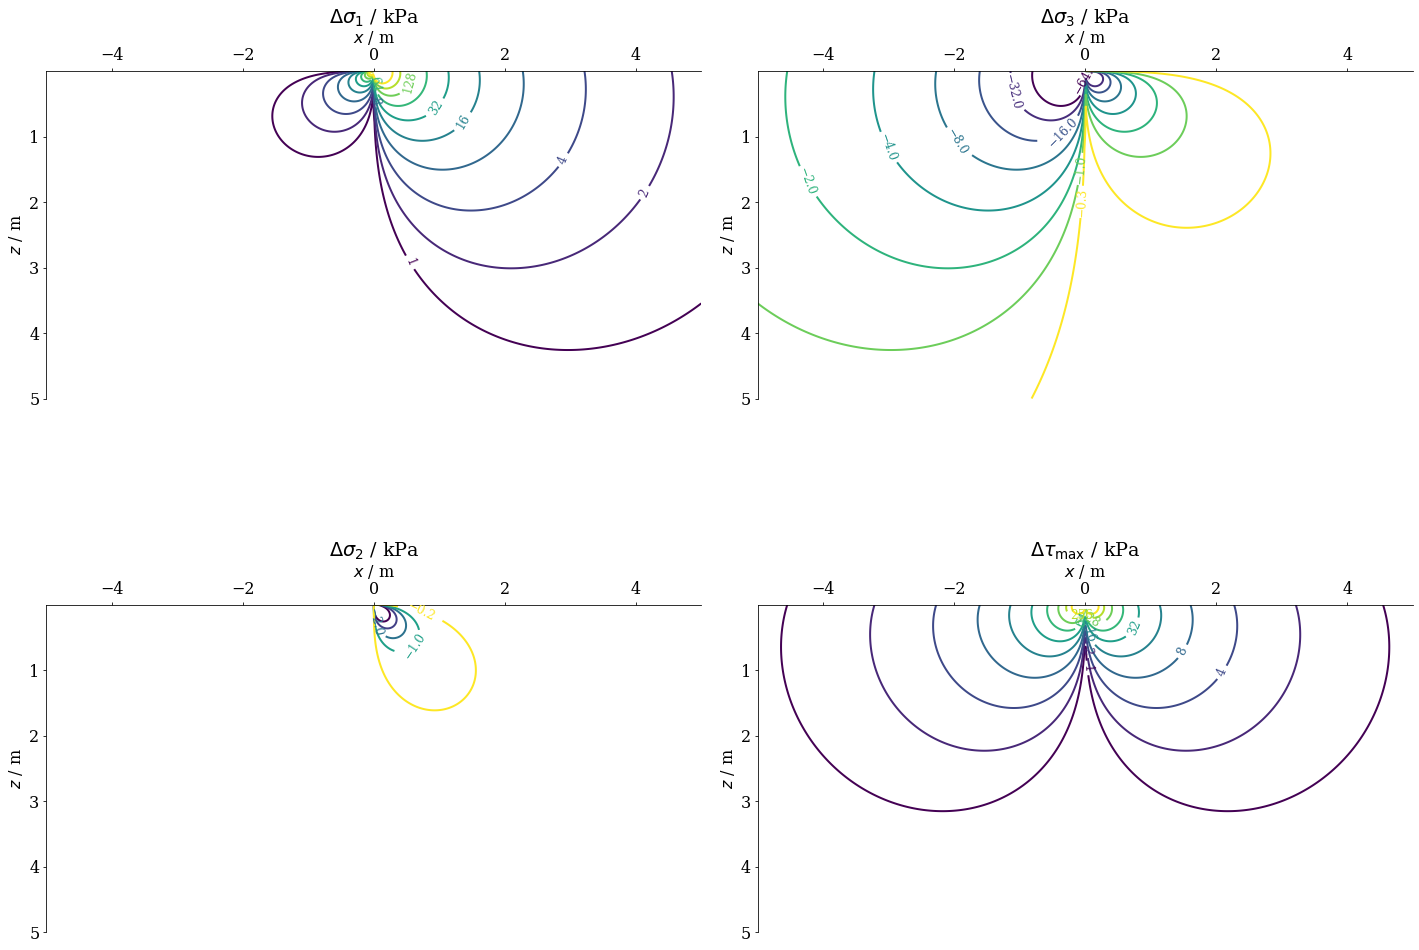

In [30]:
#HIDDEN
#%run plot_functions/stresses_under_loads_plots.ipynb
plot_isobars_principal_Boussinesq_hor()

Der Lastabtrag über Druckspannungen "vor der Kraft" und Zugspannungen "hinter der Kraft" wird dabei deutlich.

## Superposition

Wir nutzen nun das Superpositionsprinzip und betrachten die Lösung einer geneigten Kraft mit

$$
    \vec{F} = \begin{pmatrix}
        20 \\ 0 \\ 100
    \end{pmatrix} \, \text{kN}
$$

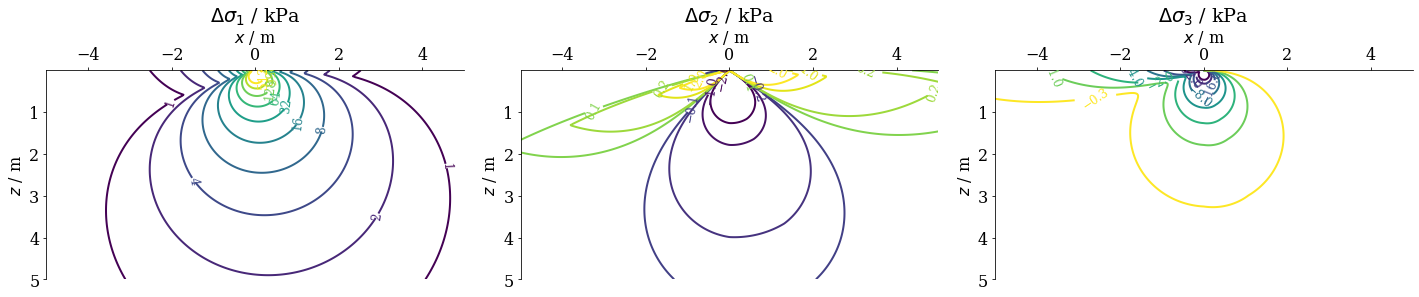

In [31]:
#HIDDEN
plot_isobars_principal_Boussinesq_combi()

Wir nutzen das Superpositionsprinzip nochmals und bringen Vertikallasten von 100 kN, 150 kN und 100 kN bei $x=-1\,$m, $x=0\,$m und $x=1\,$m auf. Dargestellt wird die Vertikalnormalspannung.

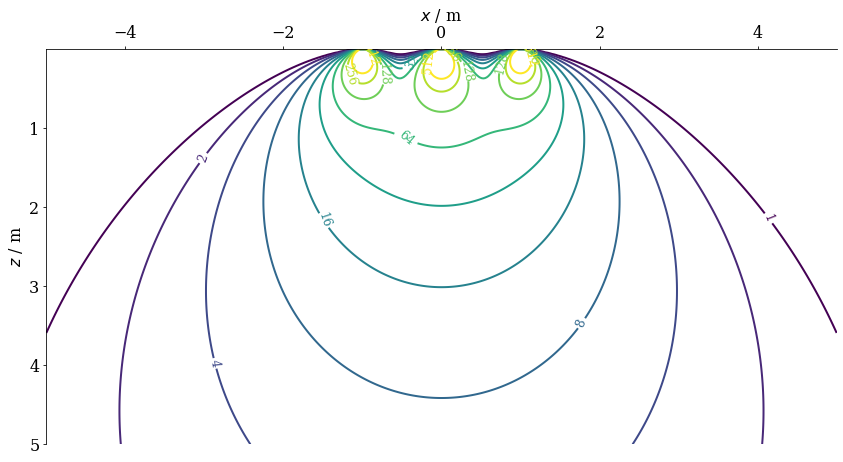

In [32]:
#HIDDEN
plot_isobars_zz_Boussinesq_two()

In größeren Tiefen verschmieren die Effekte der Einzellasten zugunsten der Gesamtbelastung. Die Spannungszwiebeln überlagern sich. Wir können so auch den Übergang zur Linienlast (hier entlang x) simulieren. Dazu definieren wir im Interval $x\in[-4,4]\,$m aller 0.5 m eine vertikale Punktlast von 50 kN und stellen die Vertikalspannungsverteilung dar.

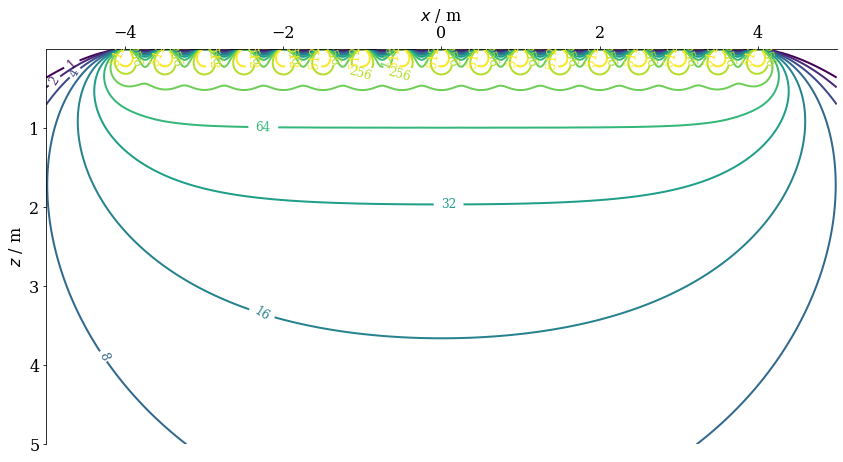

In [33]:
#HIDDEN
plot_isobars_zz_Boussinesq_multi()

## Halbraumspannungen infolge von Linienlasten $\vec{f}$

Wir betrachten nun "Kräfte pro laufendem Meter", sogennannte Linienlasten. Wir legen dafür das Koordinatensystem derart, dass o.E.d.A. die $y$-Achse in Richtung der unendlich ausgedehnten Linienlast zeige. Dementsprechend sei $x$ die zu $y$ originale oberflächenparallele Koordinate und $z$ die Vertikalkoordinate, die die Tiefe misst. Die Herleitung nach Superpositionsprinzip wurde in den ergänzenden Vorlesungsunterlagen dargestellt. Durch die unendliche Ausdehnung und die damit verbundene Symmetrie verschwinden die Schubspannungen $\tau_{y\bullet}$ und die Lösung beschränkt sich auf die verbliebenen Spannungskoordinaten.

Die folgende Lösung nach *Boussinesq* gilt für die Koordinaten des Cauchy'schen Spannungstensors unter einer vertikalen Linienlast $f_z$:

\begin{align}
    \Delta \sigma_{xx} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \frac{x^2z}{R_\text{L}^3}
    \\
    \Delta \sigma_{yy} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \nu \frac{z}{R_\text{L}}
    \\
    \Delta \sigma_{zz} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \left( \frac{z}{R_\text{L}} \right)^3
    \\
    \Delta \sigma_{xz} &= \frac{2}{\pi} \frac{f_z}{R_\text{L}} \frac{xz^2}{R_\text{L}^3}
    \\
    &\text{mit } R_\text{L} = \sqrt{x^2 + z^2}
\end{align}

Die folgende Lösung gilt für die Koordinaten des Cauchy'schen Spannungstensors unter einer horizonalen (in $x$ wirkenden) Linienlast $f_x$:

\begin{align}
    \Delta \sigma_{xx} &= \frac{2}{\pi} \frac{f_x}{R_\text{L}} \frac{x^3}{R_\text{L}^3}
    \\
    \Delta \sigma_{zz} &= \frac{2}{\pi} \frac{f_x}{R_\text{L}} \frac{xz^2}{R_\text{L}^3}
    \\
    \Delta \sigma_{xz} &= \frac{2}{\pi} \frac{f_x}{R_\text{L}} \frac{x^2z}{R_\text{L}^3}
\end{align}

Gemäß des Superpositionsprinzips können nun wiederum Lösungen für beliebig geneigte Lasten generiert werden.

Im Folgenden können Linienlasten eingegeben und die Vertikalspannungszuwächse an verschiedenen Punkten des Halbraumes verglichen werden. Der Winkel $\beta$ gibt dabei die Neigung der Linienlast zur Vertikalen an (0°: vertikale Last; $\pm 90$°: horizontale Last). Gleichzeitig werden die Isobaren von $\Delta \sigma_{zz}$ dargestellt.

Aufgabe: Vergleichen Sie die Lösung mit den Diagrammen aus der Vorlesung.

In [34]:
#HIDDEN
#%run plot_functions/stresses_under_loads_plots.ipynb
interactive_line_load()

interactive(children=(BoundedFloatText(value=100.0, description='$|\\vec{f}|$ / kN m$^{-1}$', style=Descriptio…